# T4L related figures

This notebook allows to recreate all figures in the manuscript related to T4L from the provided experimental and calculated relaxation rates.

In [1]:
import ABSURDer as absurder
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import seaborn as sns
import pandas as pd

In [2]:
rate_colors = [ '#ffc857', '#084c61', '#db3a34', '#177e89', '#2c6e49', '#323031']

In [3]:
# Dictionary to convert labels
lconv = {
        'CBHB':r'$C^\beta H^\beta$', 'CDHD':r'$C^\delta H^\delta$', 'CG2HG2':r'$C^{\gamma 2} H^{\gamma 2}$', 
        'CD2HD2':r'$C^{\delta 2} H^{\delta 2}$', 'CEHE':'$C^\epsilon H^\epsilon$', 
        'CG1HG1':r'$C^{\gamma 1} H^{\gamma 1}$', 'CG2HG2_I':r'$C^{\gamma 2} H^{\gamma 2}$ (I)', 
        'CG2HG2_V':r'$C^{\gamma 2} H^{\gamma 2}$ (V)', 'CDHD_I':r'$C^\delta H^\delta$ (I)', 
        'CDHD_L':r'$C^\delta H^\delta$ (L)', 
        'CDHD_all':r'$C^\delta H^\delta$ (all)', 'cgcorr_all':r'$C^{\gamma} H^{\gamma}$ (all)'
        } 

# Fig. 1A-D

In [4]:
rex   = '../data/exp/t4l/nmr_rates.npy'
eex   = '../data/exp/t4l/nmr_errors.npy'
mlist = '../data/exp/t4l/methyls_nmr.pkl'
_rmd  = '../data/exp/t4l/md.npy' # dummy for ABSURDer

ala146 = [4] # remove Ala146
rw = absurder.ABSURDer(rex, _rmd, eex, thetas=np.array([]), idx=ala146, methyl_list=mlist)
methyl_specific_ = {'CBHB':[], 'CDHD':[], 'CDHD_I':[], 'CDHD_L':[], 'CG2HG2':[], 'CG2HG2_I':[], 'CG2HG2_V':[], 
                   'CG2HG2_T':[], 'CD2HD2':[], 'CEHE':[], 'CG1HG1':[], 'CDHD_all':[], 'cgcorr_all':[]}

# Sort rates according to methyl group
for i,m in enumerate(rw.mnl):
    tmp = m.split('-')[-1]
    if tmp in list(methyl_specific_.keys()):
        methyl_specific_[tmp].append(i)
    if 'CDHD' in m and 'ILE' in m:
        methyl_specific_['CDHD_I'].append(i)
        methyl_specific_['CDHD_all'].append(i)
    elif 'CD1HD1' in m:
        methyl_specific_['CDHD_L'].append(i)
        methyl_specific_['CDHD'].append(i)
        methyl_specific_['CDHD_all'].append(i)
    elif 'CD2HD2' in m:
        methyl_specific_['CDHD_all'].append(i)
        
    elif 'CG2HG2' in m and 'ILE' in m:
        methyl_specific_['CG2HG2_I'].append(i)
        methyl_specific_['cgcorr_all'].append(i)
    elif 'CG2HG2' in m and 'VAL' in m:
        methyl_specific_['CG2HG2_V'].append(i)
        methyl_specific_['cgcorr_all'].append(i)
    elif 'CG2HG2' in m and 'THR' in m:
        methyl_specific_['CG2HG2_V'].append(i)
        methyl_specific_['cgcorr_all'].append(i)
    elif 'CG1HG1' in m:
        methyl_specific_['cgcorr_all'].append(i)


# INFO ON THE DATASET
# Number of methyls:  72
# Number of rates:    3
# Number of blocks:   1497
# Overall chi square: 130.10
# Overall chi square (no MD error): 165.38


In [5]:
rex = f'../data/exp/t4l/nmr_rates.npy'
eex = f'../data/exp/t4l/nmr_errors.npy'
mlist = '../data/exp/t4l/methyls_nmr.pkl'
ala146 = [4]
traj_nomderr = {1:[], 2:[], 3:[], 4:[], 5:[]}
# traj_mderr = {1:[], 2:[], 3:[], 4:[], 5:[]}
for t in traj_nomderr.keys():
    methyl_chi2s_nomderr = {'CBHB':[], 'CDHD':[], 'CDHD_I':[], 'CDHD_L':[], 'CG2HG2':[], 'CG2HG2_I':[], 'CG2HG2_V':[], 
                'CD2HD2':[], 'CEHE':[], 'CG1HG1':[], 'CDHD_all':[], 'cgcorr_all':[]}
    # methyl_chi2s_mderr = {'CBHB':[], 'CDHD':[], 'CDHD_I':[], 'CDHD_L':[], 'CG2HG2':[], 'CG2HG2_I':[], 'CG2HG2_V':[], 
                # 'CD2HD2':[], 'CEHE':[], 'CG1HG1':[], 'CDHD_all':[], 'cgcorr_all':[]}
    for m in methyl_specific_.keys():
        if methyl_specific_[m]:
            for kk, k in enumerate(['-1_0', '-0_5', 'HMS', '0_5', '1_0', '1_5', '2_0', '2_5', '3_0', '3_5', '4_0', '4_5', '5_0', '5_5']): 
                rmd = f'../data/calc/t4l/deltak_{k}/rmd.pkl'
                tmp = absurder.ABSURDer(rex, rmd, eex, idx=ala146, methyl_list=mlist, verbose=False, ignore_last=True)
                rex_m = tmp.rex[:,methyl_specific_[m]]
                rmd_m = tmp.rmd[:,methyl_specific_[m],(t-1)*100:t*100]
                eex_m = tmp.eex[:,methyl_specific_[m]]
                mlist_m = [methyl for i,methyl in enumerate(rw.mnl) if i in methyl_specific_[m]]
                mabs = absurder.ABSURDer(rex_m, rmd_m, eex_m, methyl_list=mlist_m, verbose=False)
                chi_nomderr = [mabs.chi2r_nomderr(r, mabs.w0) for r in [0,1,2,-1]]
                # chi_mderr = [mabs.chi2r(r, mabs.w0) for r in [0,1,2,-1]]
                methyl_chi2s_nomderr[m].append(chi_nomderr)
                # methyl_chi2s_mderr[m].append(chi_mderr)
            methyl_chi2s_nomderr[m] = np.array(methyl_chi2s_nomderr[m])
            # methyl_chi2s_mderr[m] = np.array(methyl_chi2s_mderr[m])
    traj_nomderr[t] = methyl_chi2s_nomderr
    # traj_mderr[t] = methyl_chi2s_mderr

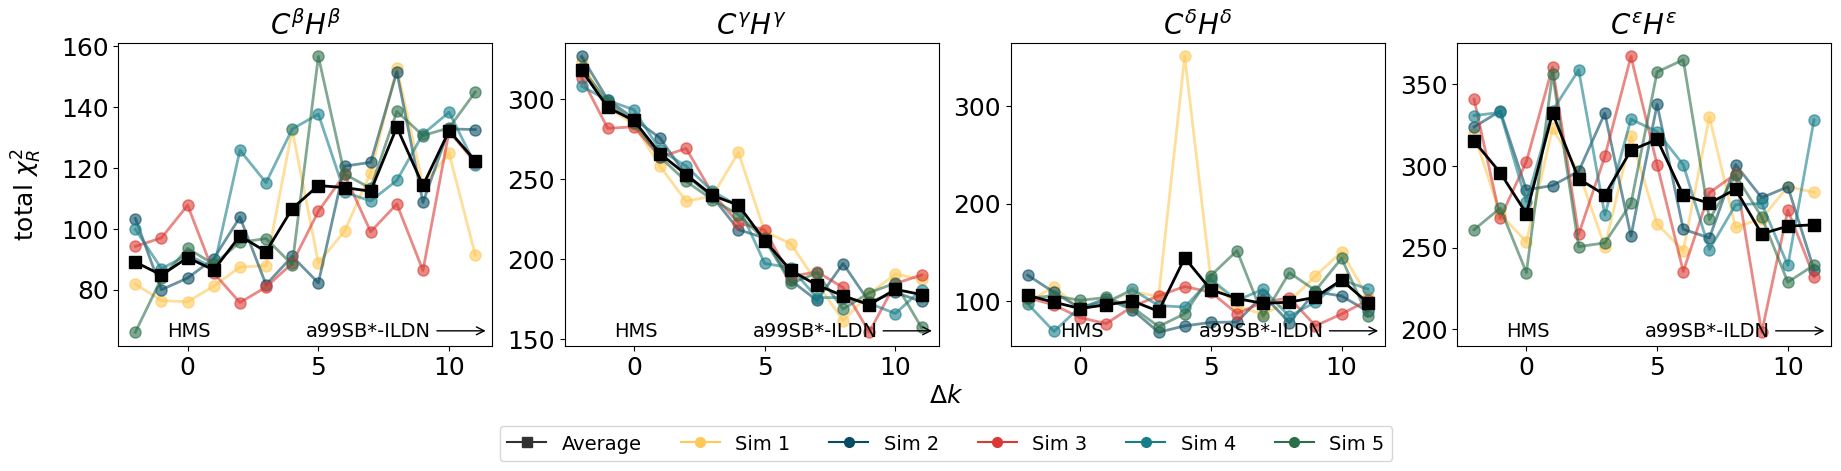

In [6]:
custom_handles = [Line2D([0], [0], color=rate_colors[-1], marker='s', markersize=7, label='Average')] + [ Line2D([0], [0], color=rate_colors[i], marker='o', markersize=7, label=f'Sim {i+1}') for i in range(5) ]

fig = plt.figure(figsize=(18,4), facecolor='w')
x = np.arange(-2, 12, 1)
for i,m in enumerate(['CBHB', 'cgcorr_all', 'CDHD_all', 'CEHE']):
    plt.subplot(1,4,i+1)
    methyl_chi2s_avg_ = []
    for t in [1,2,3,4,5]: # traj.keys():     
        methyl_chi2s_ = traj_nomderr[t].copy()
        methyl_chi2s_avg_.append(methyl_chi2s_[m][:,-1])
    for s in range(5):
        plt.plot(x, np.array(methyl_chi2s_avg_)[s], 'o-', lw=2, markersize=8, label=f'Sim {s+1}', alpha=0.6, color=rate_colors[s])
    plt.plot(x, np.average( np.array(methyl_chi2s_avg_), axis=0 ), 's-', lw=2, markersize=8, label=f'Avg.', color='k')
     
    plt.title(['$C^\\beta H^\\beta$', '$C^{\\gamma} H^{\\gamma}$', '$C^\\delta H^\\delta$', '$C^\\epsilon H^\\epsilon$'][i], fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.annotate('a99SB*-ILDN', xy=(0.99,0.05), xycoords='axes fraction', xytext=(0.67,0.05),
                arrowprops=dict(arrowstyle='->', color='k', lw=1, ls='-'),
                ha='center', va='center', fontsize=14) 
    plt.annotate('HMS', xy=(0.19,0.05), xycoords='axes fraction', ha='center', va='center', fontsize=14)
    
fig.text(0.5, -0.02, r'$\Delta k$', ha='center', fontsize=18)
ylbl = fig.text(-0.02, 0.5, r'total $\chi^2_R$', va='center', rotation='vertical', fontsize=18)

lgd = fig.legend(handles=custom_handles, loc='lower center', ncol=6, bbox_to_anchor=(0.5, -0.19))

plt.tight_layout()
plt.savefig('../plots/t4l/fig1_a_b_c_d.pdf', bbox_extra_artists=(lgd,ylbl), bbox_inches='tight')
plt.show()

# Fig. 1E-G

In [7]:
rex    = f'../data/exp/t4l/nmr_rates.npy'
eex    = f'../data/exp/t4l/nmr_errors.npy'
mlist  = f'../data/exp/t4l/methyls_nmr.pkl'
ala146 = [4] # again, remove Ala146
data = []
for k in ['original', 'HMS', 'CgCorr']:
    rmd    = f'../data/calc/t4l/deltak_{k}/rmd.pkl'
    data.append(absurder.ABSURDer(rex, rmd, eex, idx=ala146, methyl_list=mlist, verbose=False, ignore_last=True))

In [8]:
chi2s = []
rs = []
for d in data:
    w0 = d.w0
    tmp_1 = []
    tmp_2 = []
    for i in range(3):
        tmp_1.append(d.chi2r_nomderr(i, w0)) # add chi2 /wo MD errors
        tmp_2.append(np.corrcoef(d.rex[i], np.average(d.rmd[i,:,:], axis=-1))[0,1]) # add Pearson correlation
    chi2s.append(tmp_1)
    rs.append(tmp_2)
chi2s = np.array(chi2s)
rs = np.array(rs)

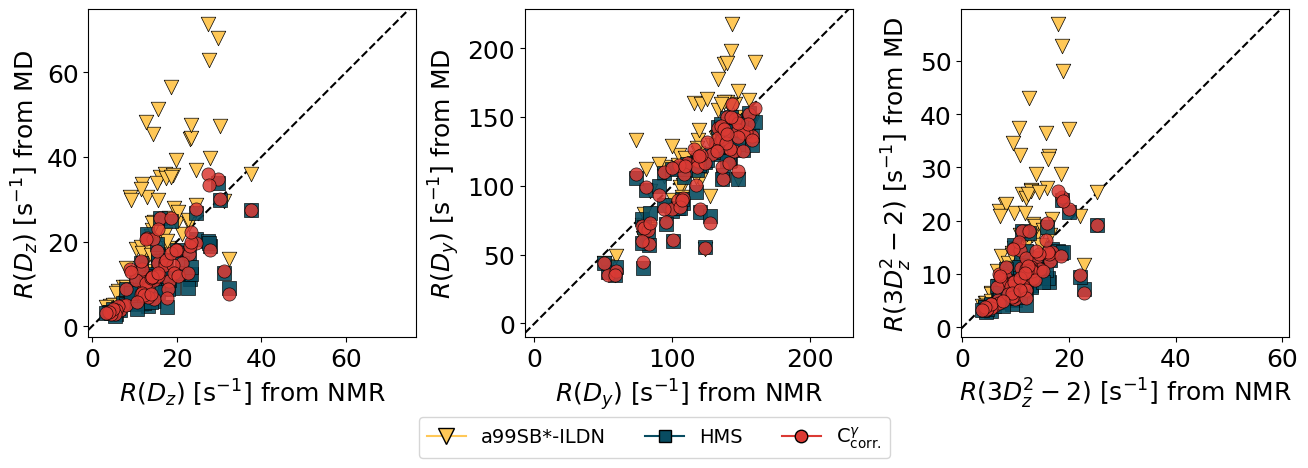

In [9]:
fig = plt.figure(figsize=[13,4], facecolor='w')
for r,rr in enumerate([r'$R(D_z)$ [s$^{-1}$]', r'$R(D_y)$ [s$^{-1}$]', r'$R(3D_z^2-2)$ [s$^{-1}$]']):
    
    plt.subplot(1, 3, r+1)
    plt.scatter(data[0].rex[r,:], np.average(data[0].rmd[r,:,:], axis=-1), marker='v', color=rate_colors[0], edgecolor='k', linewidth=0.5, s=110, alpha=1.0)
    plt.scatter(data[0].rex[r,:], np.average(data[1].rmd[r,:,:], axis=-1), marker='s', color=rate_colors[1], edgecolor='k', linewidth=0.5, s=90, alpha=0.9)
    plt.scatter(data[0].rex[r,:], np.average(data[2].rmd[r,:,:], axis=-1), marker='o', color=rate_colors[2], edgecolor='k', linewidth=0.5, s=90, alpha=0.85)
    plt.axline((1,1), slope=1, ls='--', c='k', zorder=-1)
    plt.axis('square')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel(f'{rr} from NMR', fontsize=18)
    plt.ylabel(f'{rr} from MD', fontsize=18)

custom_handles = [Line2D([0], [0], marker='v', color=rate_colors[0], markeredgecolor='k', markersize=11, label='a99SB*-ILDN'),
                  Line2D([0], [0], marker='s', color=rate_colors[1], markeredgecolor='k', markersize=9, label='HMS'),
                  Line2D([0], [0], marker='o', color=rate_colors[2], markeredgecolor='k', markersize=9, label=r'C$^{\gamma}_{\rm corr.}$')]
lgd = fig.legend(handles=custom_handles, loc='lower center', ncol=6, bbox_to_anchor=(0.5, -0.15))
plt.tight_layout(pad=0.1)
plt.savefig('../plots/t4l/fig1_e_f_g.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

# Fig. 1H-I

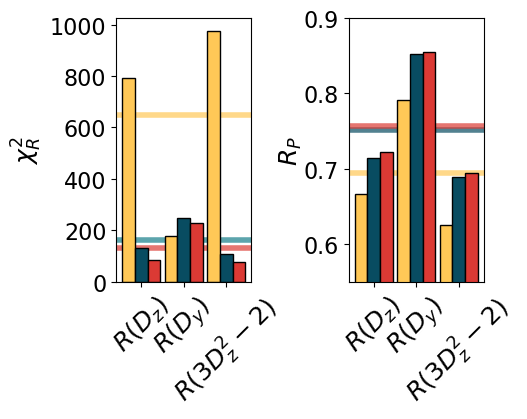

In [10]:
labels = [r'$R(D_z)$', r'$R(D_y)$', r'$R(3D_z^2-2)$']
x = np.arange(len(labels))
width = 0.3  

fig = plt.figure(figsize=[5,4], facecolor='w')

ax = plt.subplot(1,2,1)
rects1 = ax.bar(x-width, chi2s[0,:], width, color=rate_colors[0], edgecolor='k')#, label='a99SB*-ILDN')
rects2 = ax.bar(x,       chi2s[1,:], width, color=rate_colors[1], edgecolor='k')#, label='a99SB*-ILDN + meth.')
rects3 = ax.bar(x+width, chi2s[2,:], width, color=rate_colors[2], edgecolor='k')#, label=r'a99SB*-ILDN + meth. + C$^{\gamma}$H$^{\gamma}$')
for i in range(3):
    ax.axhline(np.average(chi2s[i,:], axis=-1), color=[rate_colors[0], rate_colors[3], rate_colors[2]][i], ls='-', alpha=0.7, lw=4, zorder=-1)

plt.ylabel(r'$\chi^2_R$', fontsize=18)
plt.xticks([0,1,2], labels, rotation=45, fontsize=18)
# plt.ylim(0.55,0.9)
plt.locator_params(axis='y', nbins=8)

ax = plt.subplot(1,2,2)
rects1 = ax.bar(x-width, rs[0,:], width, color=rate_colors[0], edgecolor='k')
rects2 = ax.bar(x,       rs[1,:], width, color=rate_colors[1], edgecolor='k')
rects3 = ax.bar(x+width, rs[2,:], width, color=rate_colors[2], edgecolor='k')
for i in range(3):
    ax.axhline(np.average(rs[i,:], axis=-1), color=[rate_colors[0], rate_colors[1], rate_colors[2]][i], ls='-', alpha=0.7, lw=4, zorder=-1)

plt.ylabel(r'$R_P$', fontsize=18, labelpad=0)
plt.xticks([0,1,2], labels, rotation=45, fontsize=18)
plt.ylim(0.55,0.9)
plt.locator_params(axis='y', nbins=4)

fig.tight_layout(pad=0.0001)
fig.savefig('../plots/t4l/fig1_h_i.pdf', bbox_inches='tight')
fig.show()

# Fig. S1A-C

In [11]:
cgcorr = [i for i,ii in enumerate(data[0].mnl) if 'G' in ii]
no_cgcorr = [i for i,ii in enumerate(data[0].mnl) if 'G' not in ii]

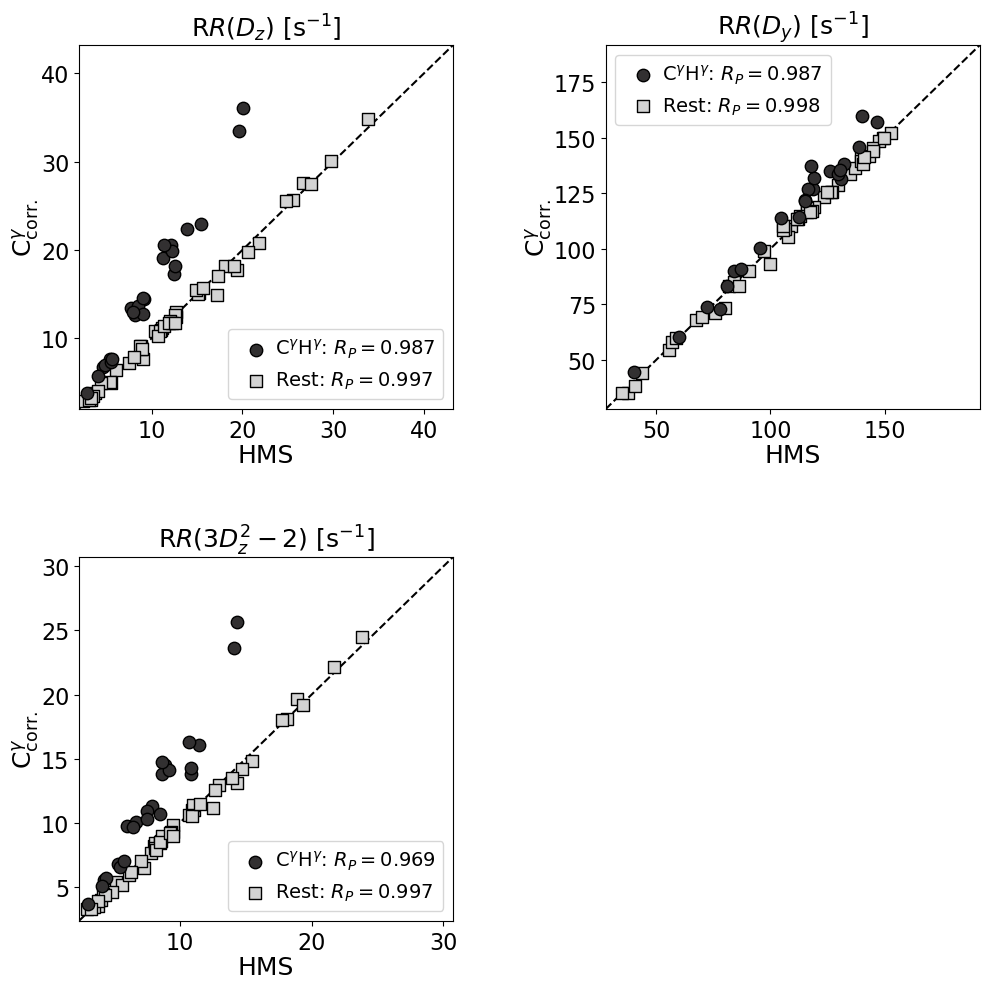

In [12]:
fig = plt.figure(figsize=[10,10])
for r in range(3):
    plt.subplot(2,2,r+1)
    plt.scatter(np.average(data[1].rmd[r,cgcorr,:], axis=-1), np.average(data[2].rmd[r,cgcorr,:], axis=-1), marker='o', edgecolor='k', color=rate_colors[-1], s=80, label=f'C$^\gamma$H$^\gamma$: $R_P={np.corrcoef(np.average(data[1].rmd[r,cgcorr,:], axis=-1), np.average(data[2].rmd[r,cgcorr,:], axis=-1))[0,1]:.3f}$', zorder=10)
    plt.scatter(np.average(data[1].rmd[r,no_cgcorr,:], axis=-1), np.average(data[2].rmd[r,no_cgcorr,:], axis=-1), marker='s', edgecolor='k', color='lightgrey', s=80, label=f'Rest: $R_P={np.corrcoef(np.average(data[1].rmd[r,no_cgcorr,:], axis=-1), np.average(data[2].rmd[r,no_cgcorr,:], axis=-1))[0,1]:.3f}$')
    xymin = np.min([np.average(data[1].rmd[r,:,:], axis=-1), np.average(data[2].rmd[r,:,:], axis=-1)])*0.8
    xymax = np.max([np.average(data[1].rmd[r,:,:], axis=-1), np.average(data[2].rmd[r,:,:], axis=-1)])*1.2
    plt.plot([xymin,xymax], [xymin,xymax], ls='--', c='k', zorder=-1)
    plt.xlim(xymin, xymax)
    plt.ylim(xymin, xymax)
    plt.title(f'R{labels[r]} [s$^{{-1}}$]', fontsize=18)
    plt.xlabel(r'HMS', fontsize=18, labelpad=1)
    plt.ylabel(r'C$^{\gamma}_{\rm corr.}$', fontsize=18, labelpad=0.001)
    plt.legend(fontsize=14, handletextpad=0.001)

fig.tight_layout(h_pad=4, w_pad=5)
plt.savefig('../plots/t4l/figs1_a_b_c.pdf')
fig.show()

# Fig. S4A

In [13]:
meth_sd = pd.DataFrame(columns=['lbl', 'std'])
for meth in ['CB', 'CG', 'CD1', 'CD2', 'CE']: # sorted
    idxs = [ i for i,ii in enumerate(data[1].mnl) if meth in ii ]
    for i,d in enumerate([data[1].rmd, data[2].rmd]):
        tmp_df = pd.DataFrame(columns=['lbl', 'std'])
        tmp_df['std'] = np.std(d[:,idxs,:], axis=-1).flatten()
        tmp_df['lbl'] = [f'{meth}']*len(tmp_df)
        tmp_df['ff'] = [f'{i}']*len(tmp_df)
        meth_sd = pd.concat([meth_sd, tmp_df])

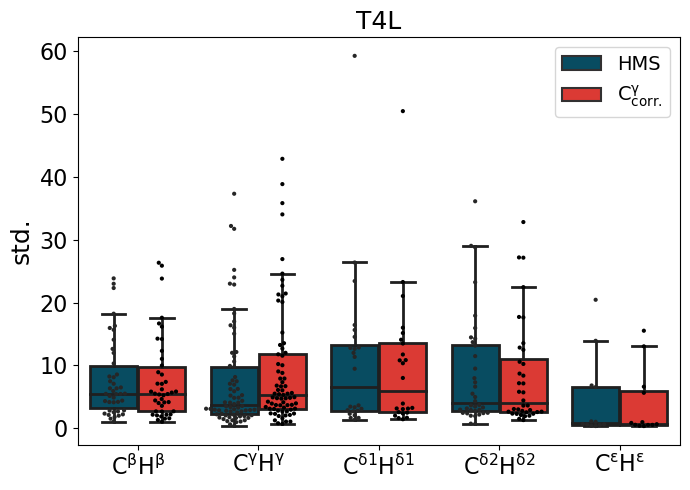

In [14]:
custom_handles = [  Patch(facecolor=rate_colors[1], edgecolor=rate_colors[-1], linewidth=1.5, label=r'HMS'),
                    Patch(facecolor=rate_colors[2], edgecolor=rate_colors[-1], linewidth=1.5, label=r'C$^{\rm \gamma}_{\rm corr.}$') ]

plt.figure(figsize=[7,5])
ax = sns.boxplot(x="lbl", y="std", data=meth_sd, showfliers=False, hue='ff', width=0.8, linewidth=2, palette=[rate_colors[1], rate_colors[2]], saturation=1)
ax = sns.swarmplot(x="lbl", y="std", data=meth_sd, color="0.", alpha=1, hue='ff', dodge=True, size=3)

ax.set_xticklabels([r'C$^{\rm \beta}$H$^{\rm \beta}$', r'C$^{\rm \gamma}$H$^{\rm \gamma}$', r'C$^{\rm \delta1}$H$^{\rm \delta1}$', r'C$^{\rm \delta2}$H$^{\rm \delta2}$', r'C$^{\rm \epsilon}$H$^{\rm \epsilon}$'])
plt.xlabel(None)
plt.ylabel('std.')
plt.title('T4L', fontsize=18)
leg = plt.legend(handles=custom_handles, loc='best', ncol=1)

plt.tight_layout()
plt.savefig(f'../plots/t4l/figs4_a.pdf')
plt.show()